# Zillow Clustering Project
<hr>

Sophia Stewart<br>
Stephanie Jones<br>
Codeup | Data Science, Hopper Cohort<br>
Monday, January 10, 2020

# Executive Summary
#### Goal
Identify drivers of error in predicting home value for single family properties<br>
#### Why?
We want to improve our zestimate home value predictions so that we can better serve those who purchase and sell homes<br>
<hr>

High `logerror` threatens our credibility as a primary source of home valuation predictions in the real estate market. We want to find the drivers of Zestimate prediction `logerror` to provide more accurate home valuations. 
<br><br>
To do this, we will use clustering to identify patterns in our 2017 single-unit property data and use those clusters to build a model which will be used for predicting logerror. If we can predict `logerror`, we can use those predictions to make more accurate predictions of home values.

### Variables
| Target | Meaning |
| :-------- | -------: |
| logerror | Our target variable; the Zestimate error which we want to minimize |


| Variables | Meaning |
| :-------- | -------: |
| tax_value | The property's tax assessed value |
| beds     | Number of bedrooms |
| baths    | Number of bathrooms, including fractional bathrooms |
| fullbaths | Number of full bathrooms |
| latitude | The property's latitude |
| longitude | The property's longitude |
| sq_ft    | Calculated total finished living area |
| yearbuilt | The year the property was built |
| age      | The age of the property |
| transactiondate | The date the property was sold |

<!-- | Clustering | Meaning |
| :-------- | -------: |
| beds_scaled | Standard-scaled `beds` |
| baths_scaled | Standard-scaled `baths` |
| sq_ft_scaled | Standard-scaled `sq_ft` |


| Modeling | Meaning |
| :-------- | -------: |
| x_train  | `train`, with scaled `tax_value`, `age`, `sqft` columns |
| y_train  | `train`, but only the target |
| x_validate | `validate`, with scaled `tax_value`, `age`, `sqft` columns |
| y_validate | `validate`, but only the target |
| x_test   | `test`, with scaled `tax_value`, `age`, `sqft` columns |
| y_test   | `test`, but only the target | -->


# Step 1 | Acquire and Wrangle
<hr>

In our `wrangle.py` module you will find the following functions:
- `acquire_zillow()` acquires zillow data from a csv file or from a sequel query (see query inside of function within module)
- `clean_zillow()` cleans the acquired data
    - filter out non-single unit properties using `propertylandusetypeid`, `beds`, `baths`, and `sqft`
    - drop null rows and columns with > 50% missing values
    - create `age` column from `yearbuilt`
    - drop any remaining null values
    - correct dtypes for int values
    - drop `propertylandusetypeid`, `transactiondate`, `yearbuilt`, `unitcnt`
    - remove outliers
- `split_zillow(df)` split data into train, validate, and test dfs


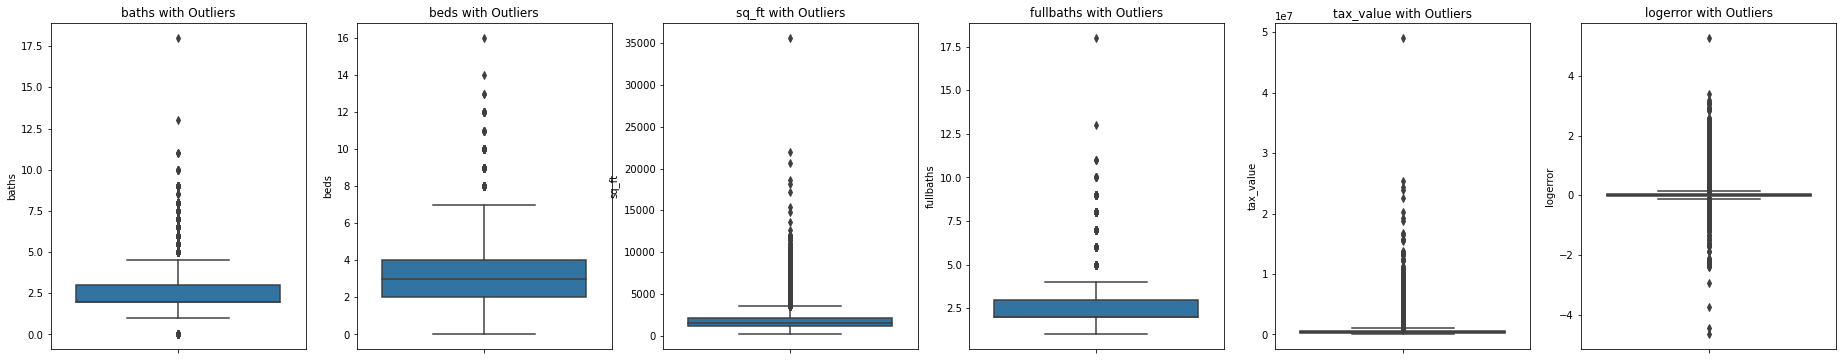

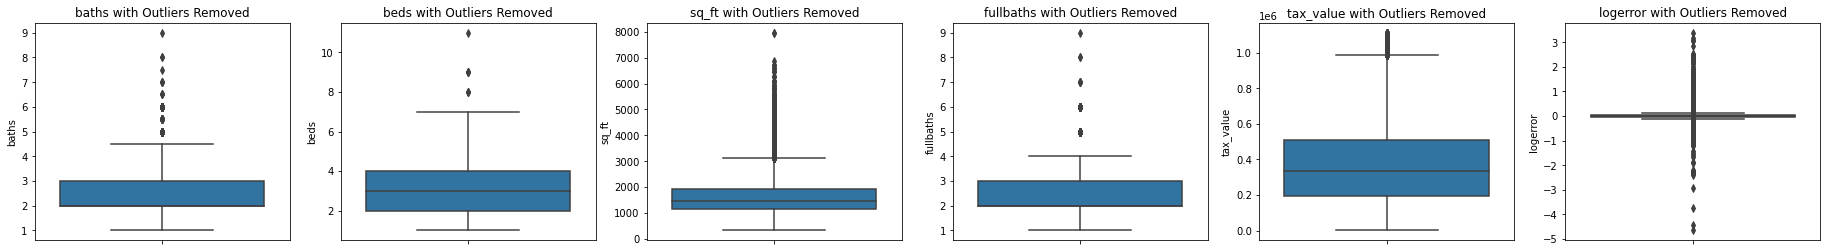

In [5]:
e.visualize_outliers(train)

In [3]:
import wrangle as w

train, validate, test = w.split_zillow(w.clean_zillow(w.acquire_zillow()))

print(f'Train Shape: {train.shape}\nValidate Shape: {validate.shape}\nTest Shape: {test.shape}')

NumExpr defaulting to 8 threads.


Train Shape: (37170, 9)
Validate Shape: (15930, 9)
Test Shape: (13276, 9)


# Step 2 | Explore
<hr>

In our `explore.py` module you will find the following functions for exploration
- Univaratiate
    - `visualize_outliers():` two rows of boxplots, data before and after outliers removed
    - `var_distributions():` plots histograms of each of our variables
- Bivariate
- Multivariate

In [4]:
import explore_stewart as e

## Univariate Exploration
##### Are there any extreme values in our outliers?

>#### We can now actually see the IQR for `bath`, `sqft`, `fullbaths`, `tax_value` and `logerror`

##### What are the distributions for each of our variables?

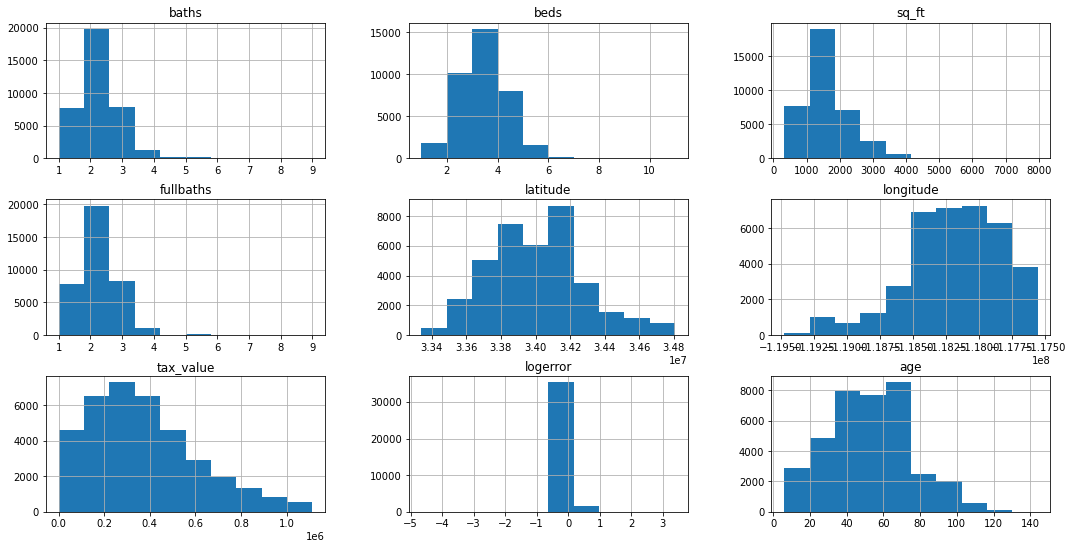

In [6]:
e.var_distributions(train)

>#### Normal
Our target variable, `logerror` is ~normally distrubuted.<br>`longitude` is also somewhat normally distrubuted. 

>#### Slightly Right Skewed 
`baths`, `fullbaths`, <br>`sqft`, <br>`latitude`, <br>`tax_value`, and <br>`age` 

>#### Slightly Left Skewed
`beds`

## Bivariate and Multivariate Exploration

### Q1. Does age affect home value? 
We think older homes will be least expensive and newer homes will be most expensive.

**Age Bins**
- `our_age` < 40
- 40 < `parents_age` < 75
- 75 < `gma_age` < 110
- 110 < `greatg_age` 

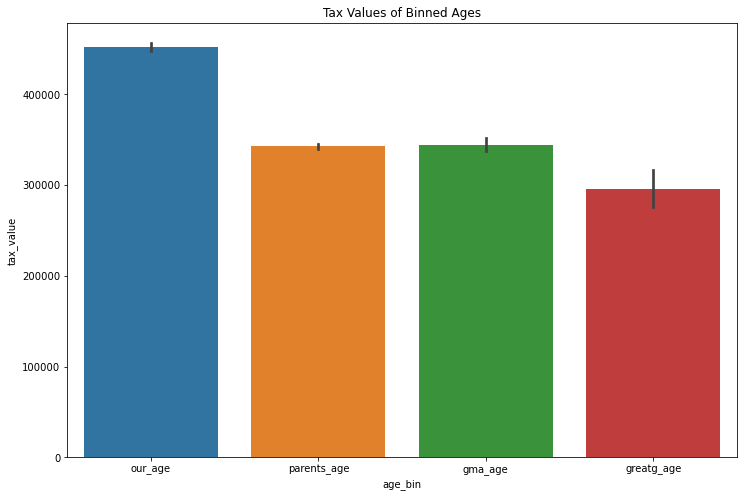

Reject H(o) | There is a statistically significant difference between the means of the youngest and oldest homes.


In [110]:
e.age_home(train)

### Older vs. Newer Home Mean Values
$Ho$: There is no statistically significant difference between the newer and older homes' mean value. <br>
$Ha$: There is no statistically significant difference between the newer and older homes' mean value. <br>
$α$ = .05 
- *If $α$ < **p** value, then we fail to reject* $Ho$)<br>

### Q2 Do homes share certain qualities based on their location?
We think we can use our features to create some clusters to plot geographically and explore homes based on the following cluster features.
##### Cluster Features
- `beds`
- `baths`
- `sqft`


***Note: It may be better to make the visualizations below on unscaled data, the axes are a little weird like in the first one some properties have a negative sq_ft value.***

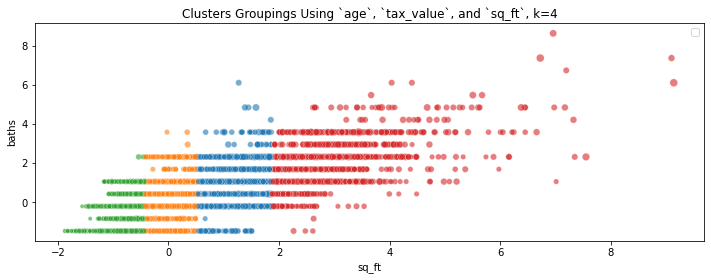

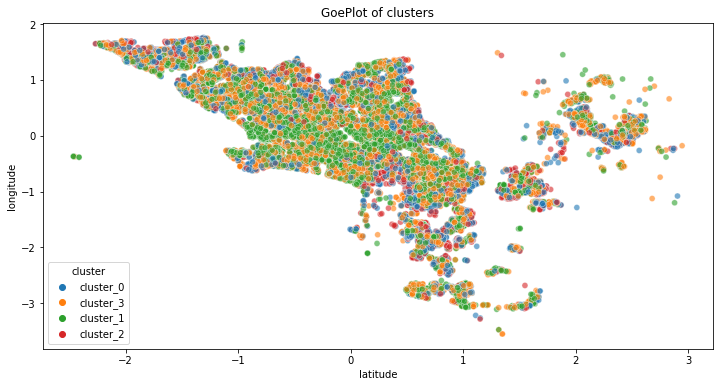

No Meaningful Patterns In Clusters When Plotted Geographically


In [12]:
X_train_scaled, X_validate_scaled, X_test_scaled = e.cluster_and_scale(train, validate, test)

### Question 3: Is there a relationship between `logerror` and `age`?
Maybe values of homes built during a certain time period are more difficult to accurately predict.

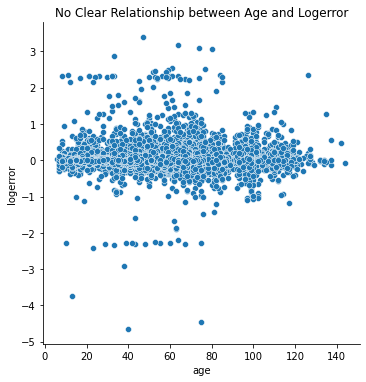

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data = train, x = 'age', y = 'logerror')
plt.title('No Clear Relationship between Age and Logerror')
plt.show();

There does not appear to be a clear relationship between `age` and `logerror`. We will run a statistical test to be sure.
- $H_{0}$: There is not a significant linear relationship between `age` and `logerror`.
- $H_{a}$: There is a significant linear relationship between `age` and `logerror`.

If p > α = .05, we fail to reject $H_{0}$

In [38]:
import scipy.stats as stats

corr, p = stats.pearsonr(train.age, train.logerror)
corr, p
α = .05

if p > α:
    print('Fail to Reject H(o)')
else:
    print('Reject H(o)')

Fail to Reject H(o)


### Q4: Is there a relationship between home size and `logerror`?
Here we wonder if homes that are larger have higher variability in price and, therefore, greater `logerror` in predicting their price.

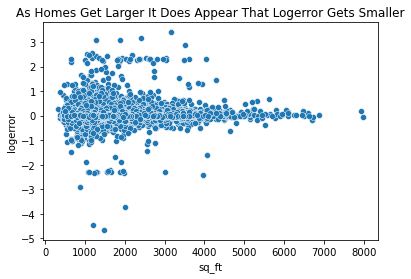

In [67]:
sns.scatterplot(data = train, x = 'sq_ft', y = 'logerror')
plt.title('As Homes Get Larger It Does Appear That Logerror Gets Smaller')
plt.show();

$H$_o: There is no relationship between home size and `logerror`<br>
$H$_a: There is a relationship between home size and `logerror`

In [108]:
corr, p = stats.pearsonr(train.sq_ft, train.logerror)
corr, p
α = .05

if p > α:
    print('Fail to Reject H(o)')
else:
    print('Reject H(o)')

Reject H(o)


### Visually there does appear to be a relationship and, after performing a statistical test we failed to reject the H(o), that there is no statistically significant relationship between `logerror` and home size, as measured in `sq_ft`

# Exploration Takeaways 
- `age` and `sq)ft` would be a good model features.
- there aren't any patterns or unique groupings that stand out geographically so `latitude` and `longitude` do not provide much value in predicting `logerror`

# Modeling

For our model evaluation metric, we decided to use RMSE because it shows the model's error in the target's units.

For our baseline, we chose to use the median logerror from the train dataset as it seemed to be representative of the data.

We developed four models:

| | Type of Model | Features Used |
| --- | --- | --- |
| **Model 1** | Ordinary Least Squares | `tax_value`, `age`, `sq_ft`, clusters |
| **Model 2** | Ordinary Least Squares | `tax_value`, `age`, `sq_ft` |
| **Model 3** | LassoLars | `tax_value`, `age`, `sq_ft`, clusters |
| **Model 4** | LassoLars | `tax_value`, `age`, `sq_ft` |

,Model 1,Model 2,Model 3,Model 4,Baseline
train,0.161726,0.161749,0.161937,0.161937,0.162235
validate,0.161160,0.161163,0.161371,0.161371,0.161686
difference,0.000567,0.000586,0.000566,0.000566,0.000550


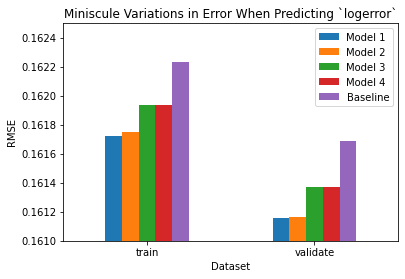

In [17]:
import model_stewart as m
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# define features on which to model and cluster
modeling = ['tax_value', 'age', 'sq_ft']
clustering = ['beds', 'baths', 'sq_ft']
# scale data, split into x and y
X_train, X_validate, X_test = m.scale_and_cluster(train, validate, test, modeling, clustering, 4)
X_train, X_validate, X_test = m.encode_clusters(X_train, X_validate, X_test)
y_train, y_validate, y_test = pd.DataFrame(train.logerror), pd.DataFrame(validate.logerror), pd.DataFrame(test.logerror)
# # run models
model_results = m.model_features_df_report(X_train, X_validate, y_train, y_validate)
model_results.columns=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Baseline']
model_results[0:2].plot.bar()
plt.ylim(0.161, 0.1625)
plt.ylabel('RMSE')
plt.xticks(rotation = 360)
plt.xlabel('Dataset')
plt.title('Miniscule Variations in Error When Predicting `logerror`')
model_results

Across the board, the models performed better on the validate data than on the train data. All of the models we created were able to predict `logerror` with less error than the baseline!

Between Models 3 and 4, we did not see any difference in RMSE, so it would appear that the clusters we created did not significantly affect the LassoLars models. 

However, between Models 1 and 2, we did see some slight differences in their RMSE values. Model 1 performed better than Model 2, which did not include our clusters.

Overall, Model 1 was our best performing model, so we ran that model on our test data:

In [15]:
# run Model 1 on test
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train.logerror)
y_test['model01_pred'] = lm.predict(X_test)
y_test['baseline'] = y_train.logerror.median()
rmse_baseline_test = mean_squared_error(y_test.logerror, y_test.baseline)**0.5
rmse_model01_test = (mean_squared_error(y_test.logerror, y_test['model01_pred']))**(0.5)
print(f'Baseline RMSE on Test: {round(rmse_baseline_test, 4)}')
print(f'Model 1 RMSE on Test: {round(rmse_model01_test, 4)}')

Baseline RMSE on Test: 0.1554
Model 1 RMSE on Test: 0.1551


# Conclusion
There are clearly patterns in the data that could help us make better predictions. Our best model was an Ordinary Least Squares model using `tax_value`, `sq_ft`, `age`, and the clusters we made during exploration using `beds`, `baths`, and `sq_ft`. While this model did beat the baseline by a small margin, there is plenty of room for improvement.

## Recommendations
- Find out what drives home value and Zestimate for homes in middle age bins
- More complete data collection
- Collect data to get a more representative idea of all locations

## Next Steps
With more time, we would like to further explore the interactions of location and logerror. There appeared to be some differences in logerror based on which county the property was located in, but our samples were unbalanced in terms of county so we decided to save this branch of exploration for another project.

# Thank You!